In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw5.ipynb")

# CPSC 330 - Applied Machine Learning 

## Homework 5: Putting it all together 
### Associated lectures: All material till lecture 13

#### Due date: See the [Calendar](https://htmlpreview.github.io/?https://github.com/UBC-CS/cpsc330-2023s/blob/master/docs/calendar.html).

## Table of contents
0. [Submission instructions](#si)
1. [Understanding the problem](#1)
2. [Data splitting](#2)
3. [EDA](#3)
4. (Optional) [Feature engineering](#4)
5. [Preprocessing and transformations](#5) 
6. [Baseline model](#6)
7. [Linear models](#7)
8. [Different models](#8)
9. (Optional) [Feature selection](#9)
10. [Hyperparameter optimization](#10)
11. [Interpretation and feature importances](#11) 
12. [Results on the test set](#12)
13. [Summary of the results](#13)
14. (Optional) [Your takeaway from the course](#15)

## Submission instructions <a name="si"></a>
<hr>
rubric={points:4}

You will receive marks for correctly submitting this assignment. To submit this assignment, follow the instructions below:

- **You may work on this assignment in a group (group size <= 4) and submit your assignment as a group.** 
- Below are some instructions on working as a group.  
    - The maximum group size is 4. 
    - You can choose your own group members. 
    - Use group work as an opportunity to collaborate and learn new things from each other. 
    - Be respectful to each other and make sure you understand all the concepts in the assignment well. 
    - It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. [Here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members) are some instructions on adding group members in Gradescope.  
- Be sure to follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2023s/blob/main/docs/homework_instructions.md).
- Upload the .ipynb file to Gradescope.
- **If the .ipynb file is too big or doesn't render on Gradescope for some reason, also upload a pdf or html in addition to the .ipynb.** 
- Make sure that your plots/output are rendered properly in Gradescope.

## Imports

In [2]:
import os

%matplotlib inline
import string
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import os
import re
import sys
from hashlib import sha1

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import tests_hw5
from sklearn import datasets
from sklearn.compose import make_column_transformer
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    make_scorer,
    precision_score,
    recall_score,
)
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

## Introduction <a name="in"></a>

In this homework you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (15-20 hours???) is a good guideline for this project . Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
<hr>
rubric={points:3}

In this mini project, you will be working on a classification problem of predicting whether a credit card client will default or not. 
For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 

**Your tasks:**

1. Spend some time understanding the problem and what each feature means. You can find this information in the documentation on [the dataset page on Kaggle](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). Write a few sentences on your initial thoughts on the problem and the dataset. 
2. Download the dataset and read it as a pandas dataframe. 

<div class="alert alert-warning">
    
Solution_1
    
</div>

_Type your answer here, replacing this text._

In [3]:
print("1. The features include the client's demographics, credit limit, track record (bill statements, previous payment, repayment status) from April-September 2005. Certain features may have more weight on the prediction, like ones that are more recent. Some that don't seem relevant from first glance are sex and marrital status.")
print("2.")
# ccc = Credit Card Clients
ccc_df = pd.read_csv("data/UCI_Credit_Card.csv")
display(ccc_df)

1. The features include the client's demographics, credit limit, track record (bill statements, previous payment, repayment status) from April-September 2005. Certain features may have more weight on the prediction, like ones that are more recent. Some that don't seem relevant from first glance are sex and marrital status.
2.


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 2. Data splitting <a name="2"></a>
<hr>
rubric={points:2}

**Your tasks:**

1. Split the data into train (70%) and test (30%) portions with `random_state=123`.

> If your computer cannot handle training on 70% training data, make the test split bigger.  

<div class="alert alert-warning">
    
Solution_2
    
</div>

In [4]:
train_df, test_df = train_test_split (ccc_df, test_size=0.4, random_state=123)
X_train, y_train = train_df.drop(columns=["default.payment.next.month"]), train_df["default.payment.next.month"]
print(X_train.shape)

(18000, 24)


<!-- END QUESTION -->

<br><br>

In [5]:
train_df['EDUCATION'].value_counts()

2    8428
1    6338
3    2947
5     178
4      68
6      31
0      10
Name: EDUCATION, dtype: int64

<!-- BEGIN QUESTION -->

## 3. EDA <a name="3"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

<div class="alert alert-warning">
    
Solution_3
    
</div>

_Type your answer here, replacing this text._

In [6]:
print("1.")
summary = train_df.loc[:, ~train_df.columns.isin(['ID','default.payment.next.month','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6'])]
summary2 = train_df.loc[:, train_df.columns.isin(['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','default.payment.next.month'])]

display(summary.describe(include='all'))
display(summary2.describe(include='all'))

1.


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.00000,18000.000000,18000.000000,18000.000000
mean,167759.093333,1.598778,1.854611,1.556778,35.506722,-0.024611,-0.144722,-0.174833,-0.225056,-0.263167,-0.296667,50969.630056,49045.925944,46938.26700,43310.035444,40140.600000,38476.487389
std,129812.651408,0.490159,0.792855,0.521762,9.212172,1.113037,1.189524,1.196714,1.170960,1.141093,1.152994,73368.088123,71318.297856,69136.77489,64722.075954,60682.151085,59178.455056
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-15308.000000,-67526.000000,-157264.00000,-50616.000000,-61372.000000,-339603.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3581.000000,2917.000000,2663.75000,2249.750000,1699.750000,1194.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21758.500000,20705.000000,19993.50000,18974.000000,18005.000000,16715.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,66519.250000,63157.250000,59639.50000,54276.250000,50069.750000,48837.250000
max,800000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,653062.000000,743970.000000,855086.00000,706864.000000,587067.000000,514975.000000


,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,18000.000000,1.800000e+04,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000
mean,5718.915611,5.949118e+03,5273.950833,4679.898056,4703.520333,5213.607611,0.222500
std,17202.925901,2.259971e+04,17582.751264,14474.187405,14973.215688,18112.882835,0.415937
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1000.000000,8.295000e+02,390.000000,264.000000,226.750000,100.000000,0.000000
50%,2100.000000,2.011000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,5011.000000,5.000000e+03,4633.000000,4026.000000,4000.000000,4000.000000,0.000000
max,873552.000000,1.227082e+06,889043.000000,621000.000000,426529.000000,528666.000000,1.000000


2.
In the dataset, the average bill amount ranges from 38767.202667 to 51107.566762, steadily increasing from April to September. And, the average payment ranges from 5237.762190 to 5895.027 from April to Sempter, generally increasing with August being the highest. So, generally people pay back a percentage of their bill. This data can help assess the client's financial capacity and payment behavior. 
The payment status is roughly the same in all 6 months. The 25th percentile = -1 (pay duly), 50th and 75th percentile = 0 (pay minimum balance). This helps show the client's behaviour and estimate how many people will default their next payment.


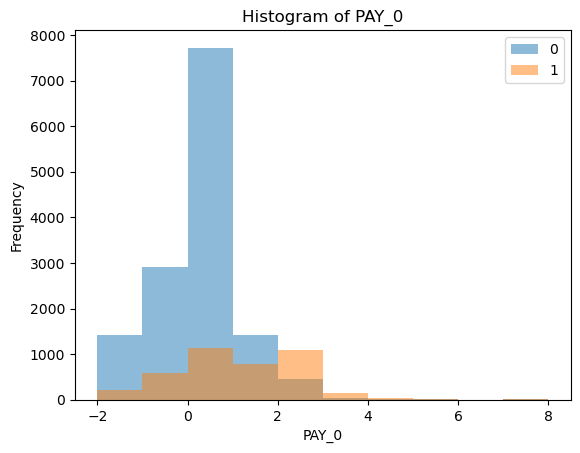

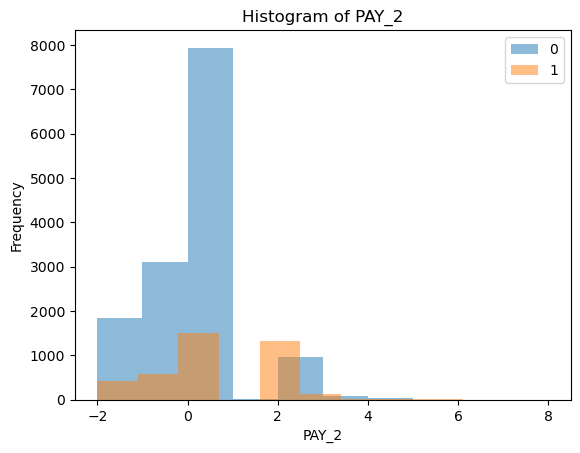

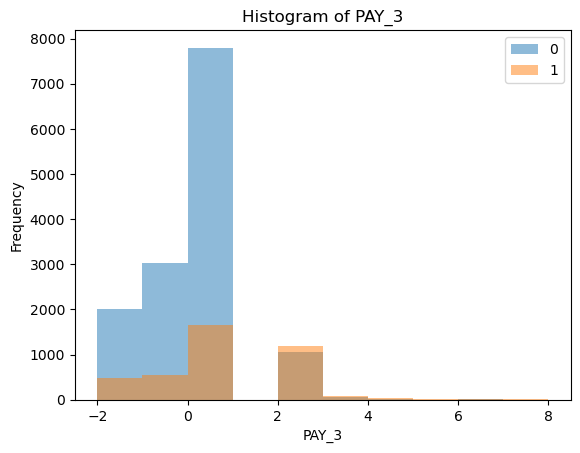

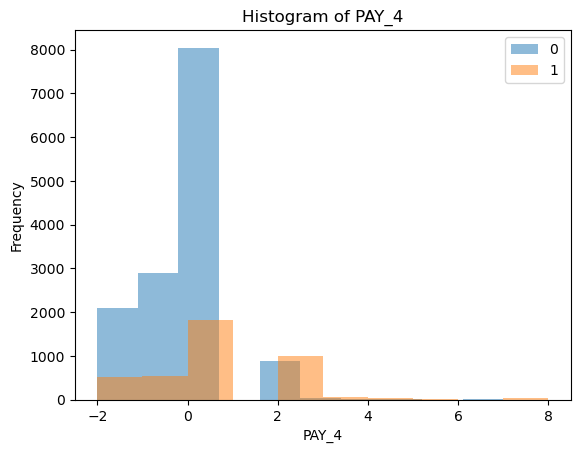

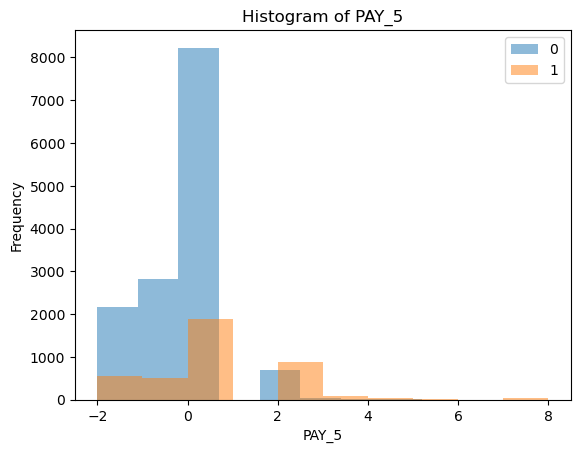

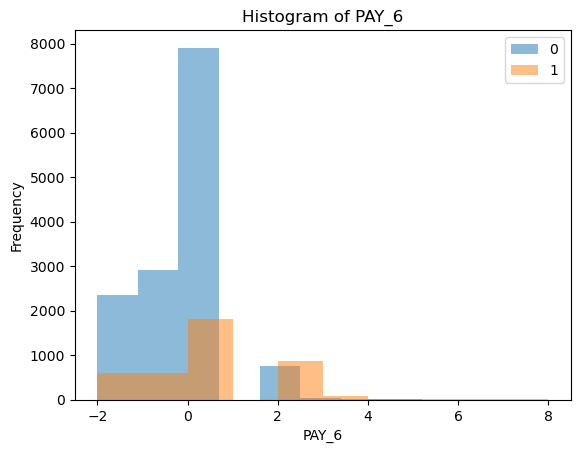

From the histograms of payment status, we can see that more percentage of people who have a delay in their payment for more than 2 months (repayment status >=2) default their next payment


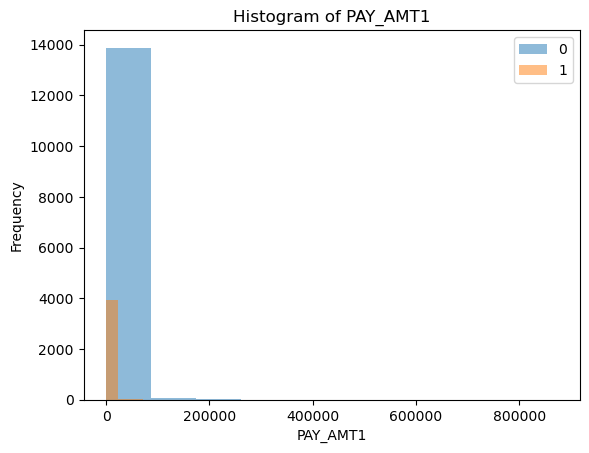

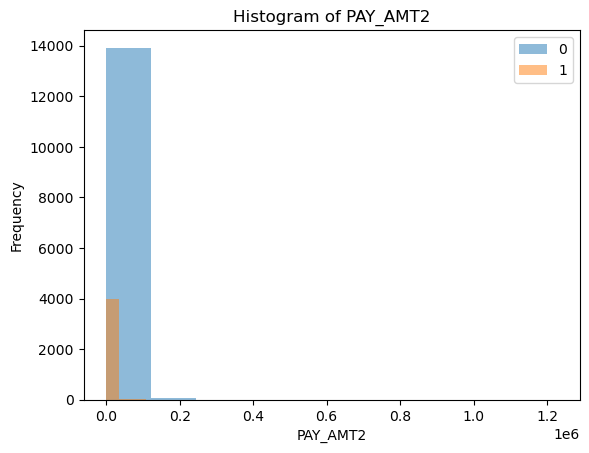

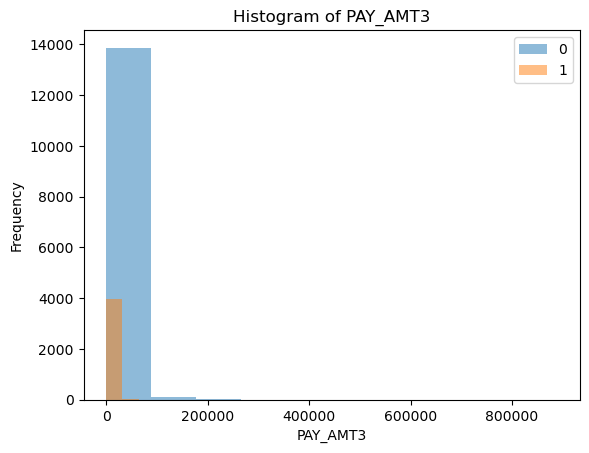

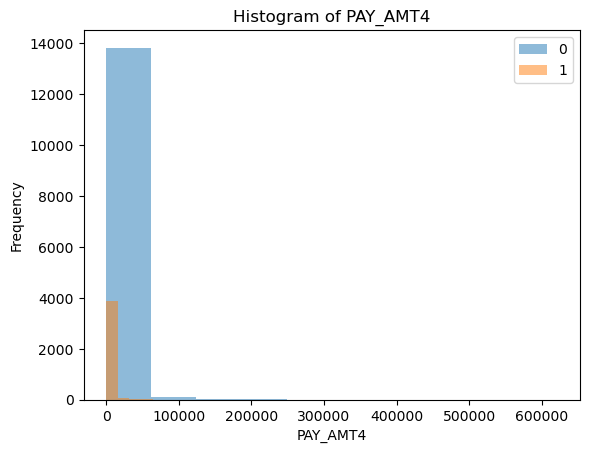

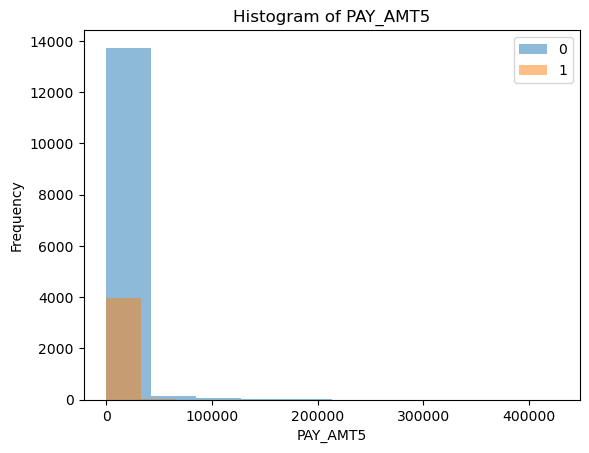

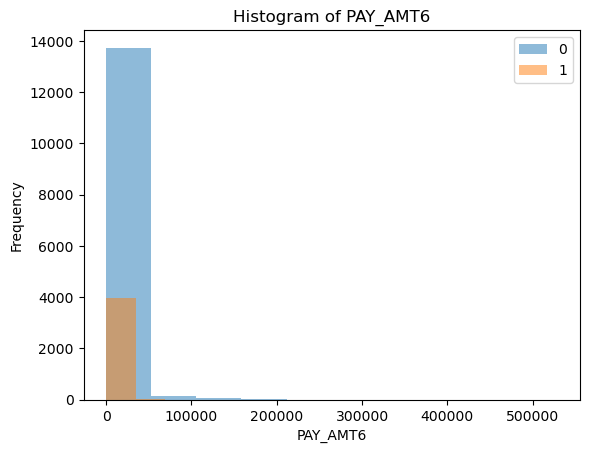

From the histograms of previous payment amount, we can see that most people with higher previous payment amount (>= 50000) do not default their next payment.


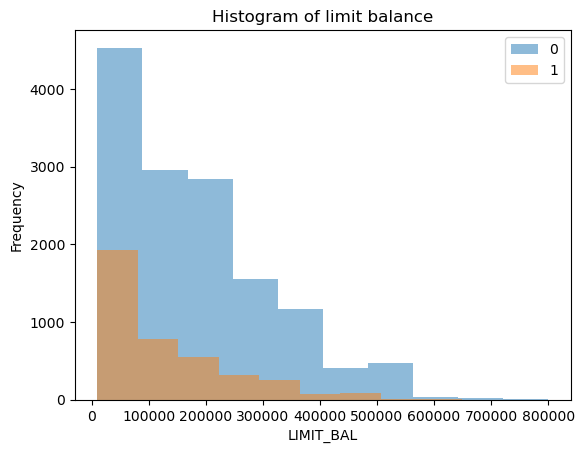

As the credit limit balance increases, more percentage of people do not default their next payment


In [7]:
print("2.")
print("In the dataset, the average bill amount ranges from 38767.202667 to 51107.566762, steadily increasing from April to September. And, the average payment ranges from 5237.762190 to 5895.027 from April to Sempter, generally increasing with August being the highest. So, generally people pay back a percentage of their bill. This data can help assess the client's financial capacity and payment behavior. ")
print("The payment status is roughly the same in all 6 months. The 25th percentile = -1 (pay duly), 50th and 75th percentile = 0 (pay minimum balance). This helps show the client's behaviour and estimate how many people will default their next payment.")

features = ["PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]
for feat in features:
    ax = train_df.groupby("default.payment.next.month")[feat].plot.hist(alpha=0.5, legend=True)
    plt.xlabel(feat)
    plt.title("Histogram of " + feat)
    plt.show()
print("From the histograms of payment status, we can see that more percentage of people who have a delay in their payment for more than 2 months (repayment status >=2) default their next payment")

features = ["PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"]
for feat in features:
    ax = train_df.groupby("default.payment.next.month")[feat].plot.hist(bins=10,alpha=0.5, legend=True)
    plt.xlabel(feat)
    plt.title("Histogram of " + feat)
    plt.show()
print("From the histograms of previous payment amount, we can see that most people with higher previous payment amount (>= 50000) do not default their next payment.")


ax = train_df.groupby("default.payment.next.month")["LIMIT_BAL"].plot.hist(bins=10,alpha=0.5, legend=True)
plt.xlabel("LIMIT_BAL")
plt.title("Histogram of limit balance")
plt.show()
print("As the credit limit balance increases, more percentage of people do not default their next payment")

In [8]:
print("3.")
print("Clients with higher previous payment amount, higher credit limit balance, and lower payment status tend to not default their next payment")

3.
Clients with higher previous payment amount, higher credit limit balance, and lower payment status tend to not default their next payment


In [9]:
print("4.")
print("Recall should be used as the metric, because it's better to have false positives than false negatives in this case. ")

4.
Recall should be used as the metric, because it's better to have false positives than false negatives in this case. 


In [10]:
...

Ellipsis

In [11]:
...

Ellipsis

In [12]:
...

Ellipsis

In [13]:
...

Ellipsis

In [14]:
...

Ellipsis

In [15]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## (Optional) 4. Feature engineering <a name="4"></a>
<hr>
rubric={points:1}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing. 

<div class="alert alert-warning">
    
Solution_4
    
</div>

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 5. Preprocessing and transformations <a name="5"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

<div class="alert alert-warning">
    
Solution_5
    
</div>

In [16]:
drop_feats = ["ID"]
binary_feats = ["SEX"]
ordinal_feats = ["EDUCATION"]
education_levels = [["0","1","2","3","4","5","6"]]
categorical_feats = ["MARRIAGE"] 
numeric_feats = ["LIMIT_BAL", "AGE", "PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6",
                 "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6",
                 "PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"] 
target = ["default.payment.next.month"]
preprocessor = make_column_transformer(
    ("drop", drop_feats),
    (OneHotEncoder(drop="if_binary", handle_unknown="ignore", sparse=False), binary_feats),
    (OrdinalEncoder(categories=education_levels, dtype=int), ordinal_feats),
    (OneHotEncoder(handle_unknown="ignore", sparse=False), categorical_feats),
    (StandardScaler(), numeric_feats)
)
    

In [17]:
...

Ellipsis

In [18]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 6. Baseline model <a name="6"></a>
<hr>
rubric={points:2}

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

<div class="alert alert-warning">
    
Solution_6
    
</div>

In [19]:
dummy = DummyClassifier(random_state = 123)
pipe_dummy = make_pipeline(preprocessor, dummy)
results_dummy = cross_validate(pipe_dummy, X_train, y_train, cv=5, return_train_score=True)
#display(results_dummy)
print("The cross validation results are around 0.777")

The cross validation results are around 0.777


In [20]:
...

Ellipsis

<!-- END QUESTION -->



In [21]:
cross_val_score(dummy, X_train, y_train)

array([0.7775, 0.7775, 0.7775, 0.7775, 0.7775])

<br><br>

<!-- BEGIN QUESTION -->

## 7. Linear models <a name="7"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.

<div class="alert alert-warning">
    
Solution_7
    
</div>

_Type your answer here, replacing this text._

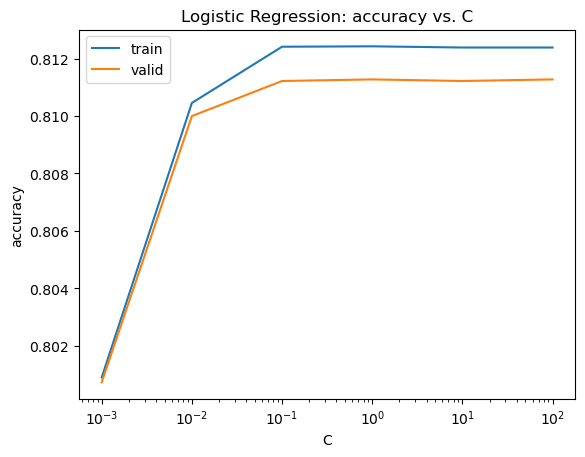

,C,Average train,Average CV
0,0.001,0.800889,0.800722
1,0.010,0.810458,0.810000
2,0.100,0.812417,0.811222
3,1.000,0.812431,0.811278
4,10.000,0.812389,0.811222
5,100.000,0.812389,0.811278


Standard deviation:  0.005678093054956091
The CV scores are around 0.80 to 0.81 and do not vary much across different values of C
The optimum C value is 0.1, validation score does not increase much from there, so a higher C value might overfit the model.


In [22]:
train_scores = []
cv_scores = []

C_vals = 10.0 ** np.arange(-3, 3, 1)

for C in C_vals:
    #     print(C)
    pipe = make_pipeline(preprocessor, LogisticRegression(max_iter=1000, C=C))    
    cv_results = cross_validate(pipe, X_train, y_train, return_train_score=True)

    train_scores.append(cv_results["train_score"].mean())
    cv_scores.append(cv_results["test_score"].mean())

plt.semilogx(C_vals, train_scores, label="train")
plt.semilogx(C_vals, cv_scores, label="valid")
plt.legend()
plt.title("Logistic Regression: accuracy vs. C")
plt.xlabel("C")
plt.ylabel("accuracy");
plt.show()

lr_results = pd.DataFrame({"C": C_vals, "Average train": train_scores, "Average CV": cv_scores})
display(lr_results)
std = np.std(cv_results['test_score'])
print("Standard deviation: ", std)
print("The CV scores are around 0.80 to 0.81 and do not vary much across different values of C")
print("The optimum C value is 0.1, validation score does not increase much from there, so a higher C value might overfit the model.") 


In [23]:
...

Ellipsis

In [24]:
...

Ellipsis

In [25]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 8. Different models <a name="8"></a>
<hr>
rubric={points:12}

**Your tasks:**
1. Try at least 3 other models aside from a linear model. One of these models should be a tree-based ensemble model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat a linear model? 

<div class="alert alert-warning">
    
Solution_8
    
</div>

_Type your answer here, replacing this text._

In [26]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

models = {
    "decision tree": DecisionTreeClassifier(random_state=123),
    "RBF SVM": SVC(random_state=123),
    "random forests": RandomForestClassifier(random_state=123, n_jobs=-1)
}

results_dict = {} 
scoring_metric = "accuracy"

pipeline_dt = make_pipeline(preprocessor, models["decision tree"])
results_dict["decision tree"] = cross_validate(pipeline_dt, X_train, y_train, cv=5, return_train_score=True, scoring=scoring_metric)

pipeline_rbf = make_pipeline(preprocessor, models["RBF SVM"])
results_dict["RBF SVM"]  = cross_validate(pipeline_rbf, X_train, y_train, cv=5, return_train_score=True, scoring=scoring_metric)

pipe_rf = make_pipeline(preprocessor,  models["random forests"])
results_dict["random forests"] = cross_validate(pipe_rf, X_train, y_train, return_train_score=True, scoring=scoring_metric)

results_df = pd.DataFrame(results_dict).T
display(results_df) 

print("The models all overfit, with decision tree overfitting the most. RBF SVM does the best with a CV score or around 0.81 ")

,fit_time,score_time,test_score,train_score
decision tree,"[0.43651342391967773, 0.4100339412689209, 0.31...","[0.0200040340423584, 0.010001659393310547, 0.0...","[0.7269444444444444, 0.7305555555555555, 0.728...","[0.9994444444444445, 0.9995138888888889, 0.999..."
RBF SVM,"[10.794207096099854, 10.662659168243408, 11.21...","[3.1852376461029053, 4.0140461921691895, 3.658...","[0.8183333333333334, 0.8147222222222222, 0.827...","[0.8270833333333333, 0.8278472222222222, 0.824..."
random forests,"[5.550398349761963, 1.5969254970550537, 1.4816...","[0.1155242919921875, 0.05753064155578613, 0.05...","[0.8155555555555556, 0.8127777777777778, 0.822...","[0.999375, 0.9994444444444445, 0.999375, 0.999..."


The models all overfit, with decision tree overfitting the most. RBF SVM does the best with a CV score or around 0.81 


In [27]:
...

Ellipsis

In [28]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## (Optional) 9. Feature selection <a name="9"></a>
<hr>
rubric={points:2}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV` or forward selection for this. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises. 

<div class="alert alert-warning">
    
Solution_9
    
</div>

_Type your answer here, replacing this text._

In [29]:
...

Ellipsis

In [30]:
...

Ellipsis

In [31]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 10. Hyperparameter optimization <a name="10"></a>
<hr>
rubric={points:10}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 

<div class="alert alert-warning">
    
Solution_10
    
</div>

_Type your answer here, replacing this text._

In [ ]:
max_depth = [2, 4, 6, 8, 10]
C_vals = 10.0 ** np.arange(-3, 3, 1)
gamma = [0.001, 0.01, 0.1, 1.0, 10.0]

param_grid_dt = {
    "decisiontreeclassifier__max_depth": max_depth, 
}

param_grid_rbf = {
    "svc__C": C_vals,
    "svc__gamma": gamma
}

param_grid_rf = {
    "randomforestclassifier__max_depth": max_depth, 
}

grid_search_dt = GridSearchCV(pipeline_dt, param_grid_dt, cv=5, n_jobs=-1, return_train_score=True)
grid_search_rbf = GridSearchCV(pipeline_rbf, param_grid_rbf, cv=5, n_jobs=-1, return_train_score=True)
grid_search_rf = GridSearchCV(pipe_rf, param_grid_rf, cv=5, n_jobs=-1, return_train_score=True)

grid_search_dt.fit(X_train, y_train)
grid_search_rbf.fit(X_train, y_train)
grid_search_rf.fit(X_train, y_train)

results_dt = pd.DataFrame(grid_search_dt.cv_results_)
relevant_dt = [
    "mean_test_score",
    "param_decisiontreeclassifier__max_depth",
    "rank_test_score",
]
results_dt = pd.DataFrame(grid_search_dt.cv_results_)[relevant_dt].set_index("rank_test_score").sort_index()
display(results_dt.T)

results_rbf = pd.DataFrame(grid_search_rbf.cv_results_)
relevant_rbf = [
    "mean_test_score",
    "param_svc__C",
    "param_svc__gamma",
    "rank_test_score",
]
results_rbf = pd.DataFrame(grid_search_rbf.cv_results_)[relevant_rbf].set_index("rank_test_score").sort_index()
display(results_rbf.T)

results_rf = pd.DataFrame(grid_search_rf.cv_results_)
relevant_rf = [
    "mean_test_score",
    "param_randomforestclassifier__max_depth",
    "rank_test_score",
]
results_rf = pd.DataFrame(grid_search_rf.cv_results_)[relevant_rf].set_index("rank_test_score").sort_index()
display(results_rf.T)


best_max_depth_dt = grid_search_dt.best_params_["tree__max_depth"]
best_score_dt = grid_search_dt.best_score_
print("tree")
print("best max depth", best_max_depth_dt)
print("best score", best_score_dt)

best_C_rbf = grid_search_rbf.best_params_["rbf__C"]
best_gamma_rbf = grid_search_rbf.best_params_["rbf__gamma"]
best_score_rbf = grid_search_rbf.best_score_
print("rbf")
print("best C", best_C_rbf)
print("best gamma", best_gamma_rbf)
print("best score", best_score_rbf)

best_max_depth_rf = grid_search_rf.best_params_["rf__max_depth"]
best_score_rf = grid_search_rf.best_score_
print("rf")
print("best max depth", best_max_depth_rf)
print("best score", best_score_rf)




In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 11. Interpretation and feature importances <a name="1"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Use the methods we saw in class (e.g., `eli5`, `shap`) (or any other methods of your choice) to examine the most important features of one of the non-linear models. 
2. Summarize your observations. 

<div class="alert alert-warning">
    
Solution_11
    
</div>

_Type your answer here, replacing this text._

In [ ]:
feature_names = (numeric_feats + categorical_feats + binary_feats + ordinal_feats + drop_feats)
pipeline_dt.fit(X_train, y_train)

import eli5
eli5_dt = eli5.explain_weights(
    pipeline_dt.named_steps["decisiontreeclassifier"], feature_names=feature_names
)

display(eli5_dt)

import shap
X_train_enc = pd.DataFrame(
    data=preprocessor.transform(X_train),
    columns=feature_names,
    index=X_train.index,
)

dt_explainer = shap.TreeExplainer(pipeline_dt.named_steps["decisiontreeclassifier"])
train_dt_shap_values = dt_explainer.shap_values(X_train_enc)
display(train_dt_shap_values)

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 12. Results on the test set <a name="12"></a>
<hr>

rubric={points:10}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 
3. Take one or two test predictions and explain these individual predictions (e.g., with SHAP force plots).  

<div class="alert alert-warning">
    
Solution_12
    
</div>

_Type your answer here, replacing this text._

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 13. Summary of results <a name="13"></a>
<hr>
rubric={points:12}

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook in the [Submission instructions section](#si).

<div class="alert alert-warning">
    
Solution_13
    
</div>

_Type your answer here, replacing this text._

In [ ]:
print("3. Testing different thresholds for the decision trees and forests as well as scoring metrics could improve the performance of the model ")

In [ ]:
...

<!-- END QUESTION -->

<br><br>

<br><br>

<!-- BEGIN QUESTION -->

## (Optional) 14. Your takeaway <a name="15"></a>
<hr>
rubric={points:2}

**Your tasks:**

What is your biggest takeaway from the supervised machine learning material we have learned so far? Please write thoughtful answers.  

<div class="alert alert-warning">
    
Solution_14
    
</div>

<!-- END QUESTION -->

<br><br>

**PLEASE READ BEFORE YOU SUBMIT:** 

When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
4. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope. 

This was a tricky one but you did it! Have a great weekend! 

![](img/eva-well-done.png)